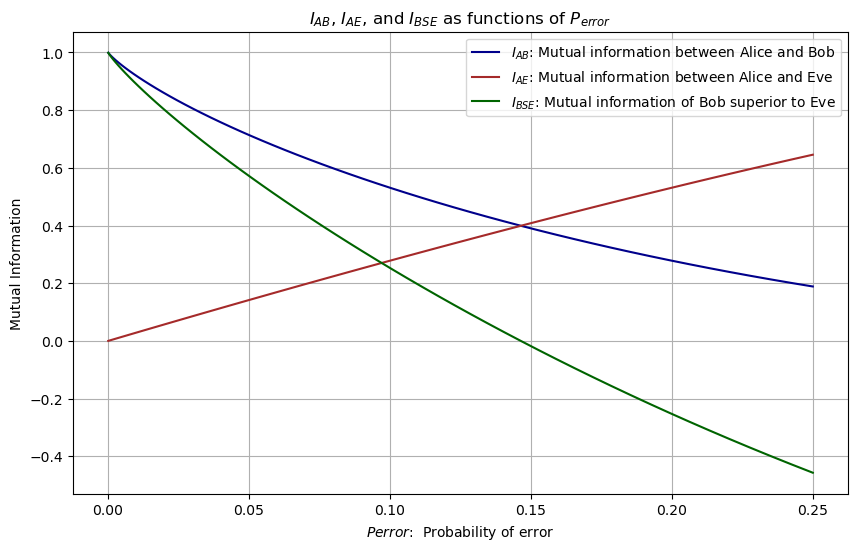

In [1]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 1e-6 
theta_step = 1 
theta_values, IAE_values, IAB_values, IBSE_values, Perror_values = [], [], [], [], []
theta = 1

while theta <= 60:
    theta_rad = np.deg2rad(theta)
    IAE = 0.5 * ((1 + np.sin(theta_rad)) * np.log2(1 + np.sin(theta_rad)) + 
                 (1 - np.sin(theta_rad)) * np.log2(1 - np.sin(theta_rad)))
    IAB = 0.5 * ((1 + np.cos(theta_rad)) * np.log2(1 + np.cos(theta_rad)) + 
                 (1 - np.cos(theta_rad)) * np.log2(1 - np.cos(theta_rad)))
    IBSE = IAB - IAE
    Perror = (1-np.cos(theta_rad))/2
    Perror_values.append(Perror)
    theta_values.append(theta)
    IAE_values.append(IAE)
    IAB_values.append(IAB)
    IBSE_values.append(IBSE)    
    if np.fabs(IBSE - IAE) < epsilon:
        print(f"Convergence reached: IBSE - IAE = {IBSE - IAE}, theta = {theta}, IAE = {IAE}, IBSE = {IBSE}")
    theta += theta_step


plt.figure(figsize=(10, 6))
plt.plot(Perror_values, IAB_values, label='$I_{AB}$: Mutual information between Alice and Bob', color='darkblue')
plt.plot(Perror_values, IAE_values, label='$I_{AE}$: Mutual information between Alice and Eve', color='brown')
plt.plot(Perror_values, IBSE_values, label='$I_{BSE}$: Mutual information of Bob superior to Eve', color='darkgreen')
plt.xlabel(r'$Perror$:  Probability of error') 
plt.ylabel('Mutual Information')
plt.title('$I_{AB}$, $I_{AE}$, and $I_{BSE}$ as functions of $P_{error}$') 
plt.legend()
plt.grid(True)
plt.show()